###### This program uses the dual moving crossover to determine when to buy and sell stock. 

The Dual Moving Average Crossover trading system uses two moving averages, one short and one long. The system trades when the short moving average crosses the long moving average.<br>
The system optionally uses a stop based on Average True Range (ATR). If the ATR stop is used, the system will exit the market when that stop is hit.<br>

If the ATR stop is not used, the Dual Moving Average Crossover system does not have an explicit stop and will always be in the market, making it a reversal system. It will exit a position only when the moving averages cross. At that point, it will exit and enter a new position in the opposite direction. In this case, the positions are sized based only on ATR using a custom money manager.<br>

If an ATR stop is not used, then the entry risk is essentially infinite. This will cause the R-Multiples relatively meaningless since all gains will be less than the infinite risk of entering without any stop.<br>

In [87]:
#Imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
#loading the data: Apple stock data from 29.09.2014 to 29.03.2018
df = pd.read_csv('AAPL.csv')

In [89]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


Text(0, 0.5, 'Adj. Close Price in USD')

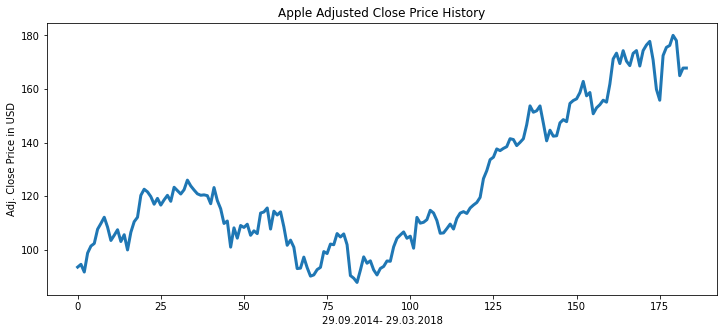

In [90]:
# Visualize the data over the given timespan
plt.figure(figsize=(12,5) )
plt.plot(df['Adj Close'],linewidth=3)
plt.title('Apple Adjusted Close Price History')
plt.xlabel('29.09.2014- 29.03.2018')
plt.ylabel('Adj. Close Price in USD')


In [91]:
#Creating simple moving average with a 30-day window
#short term moving average 

sma30 = pd.DataFrame()
sma30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()

In [92]:
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,166.220082
180,166.944129
181,167.154109
182,167.320155


In [93]:
#Creating simple moving average with a 100-day window
#long term moving average

sma100 = pd.DataFrame()
sma100['Adj Close'] = df['Adj Close'].rolling(window= 100).mean()

In [94]:
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,133.802447
180,134.523642
181,135.154237
182,135.928340


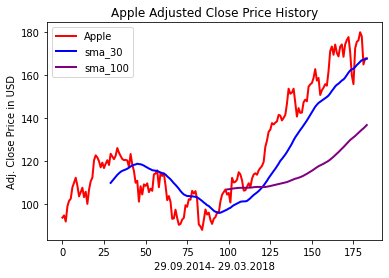

In [95]:
#Visualization of the simple moving averages 
plt.plot(df['Adj Close'],linewidth=2, c='r',label ='Apple')
plt.plot(sma30['Adj Close'],lw=2, c='b',label='sma_30')
plt.plot(sma100['Adj Close'],lw=2, c='purple',label='sma_100')

plt.title('Apple Adjusted Close Price History')
plt.xlabel('29.09.2014- 29.03.2018')
plt.ylabel('Adj. Close Price in USD')
plt.legend()


In [96]:
#Note:
#sma100['Adj Close'].min()

Whereever the sma100 and sma30 intersect is basically a signal to buy. 

In [97]:
#Create a new dataframe to store all the data
df1 = pd.DataFrame()
df1['Apple']= df['Adj Close']
df1['sma30']= sma30['Adj Close']
df1['sma100']= sma100['Adj Close']
df1

,Apple,sma30,sma100
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,166.220082,133.802447
180,178.020004,166.944129,134.523642
181,164.940002,167.154109,135.154237
182,167.779999,167.320155,135.928340


In [98]:
#Creating a function that will return the buy and sell price
def buy_sell(df1):
    buy_price= []
    sell_price = []
    #'cross' tells when the moving averages intersect
    cross = -1
    
    for i in range(len(df1)):
        if df1['sma30'][i]> df1['sma100'][i]:
            if cross != 1:
                buy_price.append(df1['Apple'][i])
                sell_price.append(np.nan)#unavailable
                cross = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
        elif df1['sma30'][i]<df1['sma100'][i]:
            if cross != 0:
                buy_price.append(np.nan)
                sell_price.append(df1['Apple'][i])
                cross =0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    return(buy_price, sell_price)
                
            
        


In [99]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(df1)


In [100]:
df1['buy_price']= buy_sell[0]
df1['sell_price']= buy_sell[1]

In [101]:
df1

,Apple,sma30,sma100,buy_price,sell_price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,NaN,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,166.220082,133.802447,NaN,NaN
180,178.020004,166.944129,134.523642,NaN,NaN
181,164.940002,167.154109,135.154237,NaN,NaN
182,167.779999,167.320155,135.928340,NaN,NaN


In [102]:
df1

,Apple,sma30,sma100,buy_price,sell_price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,NaN,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,166.220082,133.802447,NaN,NaN
180,178.020004,166.944129,134.523642,NaN,NaN
181,164.940002,167.154109,135.154237,NaN,NaN
182,167.779999,167.320155,135.928340,NaN,NaN


Text(0, 0.5, 'Adj. Close Price in USD')

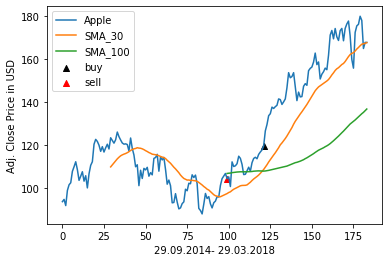

In [103]:
# Visualize the data and the strategy
plt.plot(df1['Apple'], label = 'Apple')
plt.plot(df1['sma30'], label = 'SMA_30')
plt.plot(df1['sma100'], label = 'SMA_100')
plt.scatter(df1.index, df1['buy_price'], label='buy',
           marker ='^', c='black')
plt.scatter(df1.index, df1['sell_price'], label ='sell',
           marker= '^', c='red')
plt.legend()
plt.xlabel('29.09.2014- 29.03.2018')
plt.ylabel('Adj. Close Price in USD')

The strategy here actually seems weak which could be because we only considered a tiny portion data of only one asset!